# 2. Aprendizaje no supervisado 


## 2.1.Objetivo

El objetivo de este apartado es comprobar como se hace una mejor "Clusterización" de los pisos usando KMeans. Intentaremos deducir si la mediana que (está en 875000 $) es un valor adecuado para catalogar un piso en caro o barato. Para ellos vamos a comparar los resultados de clusterizar usando Kmeans, empleando como entrada  tres variables obtendias mediante TSNE sobre el dataframente original. Después llevaremos a cabo lo mismo pero empleando las tres variables con más peso en relación al precio que se vieron en la práctica de de regresión lineal y como último paso añadiremos una cuarta variable, ya que tras algunas pruebas ha demostrado hacer una buena clasificacion de los pisos.

Cargamos las librerias que vamos a necesitar  y el archivo donde se encuetran las funiones que usaremos posteriormente. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()
from scipy import stats
def close_to_far_from_center(X,centroid, n=10):
    
    distance = np.sum((X - centroid) ** 2, axis=1)
    
    print('Close to center')
    display(data_RF.iloc[np.argsort(distance)[:n]])
    
    print('Far from center')
    display(data_RF.iloc[np.argsort(distance)[-n:]])

from src.utils import pd, np, plt
import  src.utils 

# Useful functions
from src.utils import load_examples, plot_scatter, plot_silhouette




Cargamos los datos con las variables del dataframe.

In [4]:
# cargamos los datos

data_RF = pd.read_csv("./CSV/seleccion_variables_RF_bathandrooms.csv",sep=',')
data_RF = data_RF.drop('Unnamed: 0',axis=1)

columns=['Rooms','Distance','Postcode','Bathroom','Car','Landsize','Propertycount','Distancia_NEW','Longtitude','Lattitude','Location_TRA','Price']
data_RF=data_RF[columns]
#ponemos la columna precio al final

data_RF.head(5)
data_RF.describe()

,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,Distancia_NEW,Longtitude,Lattitude,Location_TRA,Price
count,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,27056.000000,2.705600e+04
mean,2.994530,11.314033,3114.204590,1.552262,1.667431,612.205509,7573.720166,11.952305,145.008020,-37.808097,3.835397,1.053621e+06
std,0.950429,6.799548,111.501632,0.675360,0.918234,3249.934429,4496.112130,7.849907,0.111148,0.083232,0.007949,6.432746e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,83.000000,0.174520,144.540220,-38.190430,3.800381,8.500000e+04
25%,2.000000,6.400000,3046.000000,1.000000,1.000000,264.000000,4294.000000,6.007600,144.950700,-37.852207,3.831049,6.400000e+05
50%,3.000000,10.500000,3088.000000,1.000000,2.000000,509.000000,6567.000000,10.276541,145.016100,-37.807955,3.835749,8.750000e+05
75%,4.000000,14.000000,3155.000000,2.000000,2.000000,661.000000,10412.000000,15.780575,145.068500,-37.760771,3.839746,1.300000e+06
max,16.000000,48.100000,3978.000000,9.000000,18.000000,433014.000000,21650.000000,49.578383,145.526350,-37.397800,3.877280,1.120000e+07


No contamos con variables cualitativas. 

Añadimos una columna adicional categorica para clasificar el precio como hemos visto en el analisis anterior donde dividimos las casa en cara y baratas en funcion de la mediana. 

    -Casas caras como 1
    -Casas baratas como 0 

In [3]:
from sklearn import preprocessing
#Eliminamos columnas que podrían considerarse como categoricas a pesar de ser numericas
#PostCode y PropertyCount

#añadimos una columna adicional categorica para clasificar el precio

intervalos = np.digitize(np.array(data_RF[['Price']]),[875000])
data_RF[['cat_precio']]=intervalos

# convertimos el DataFrame al formato necesario para scikit-learn
data = np.array(data_RF[['Rooms','Distance','Bathroom','Car','Landsize','Distancia_NEW','Longtitude','Lattitude','Price','cat_precio']].values)

y_price=data[:,-1]

In [4]:

data_RF.dtypes

Rooms              int64
Distance         float64
Postcode         float64
Bathroom           int64
Car                int64
Landsize         float64
Propertycount    float64
Distancia_NEW    float64
Longtitude       float64
Lattitude        float64
Location_TRA     float64
Price              int64
cat_precio         int64
dtype: object

El objetivo de este apartado es comprobar como se hace una mejor "Clusterizacion" de los pisos usando KMeans. Vamos a compàrar los resultados de clusterizar usando Kmeans al que se le va a pasar tres variables obtendias mediante TSNE sobre el dataframente original y llevaremos a cabo lo mismo pero empleando las tres variables con mas peso en relacion al precio que se vieron en la practica de de regresion lineal,

In [5]:
X = data[:,:-2] 
#X = data[:,7:-2]    # nos quedamos con el resto
#X = data[]
feature_names = data_RF.columns[0:-1].to_list()

scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)
data_RF.describe()
y_price

from sklearn.manifold import TSNE

#Take a sample and plot it
N = 5000
random_idx = np.random.choice(Xs.shape[0], N, replace=False)

X_tsne = TSNE(n_components=3, perplexity=20, learning_rate=100,random_state=0).fit_transform(Xs[random_idx,:])
X_new = np.array(data_RF.iloc[:,[7,8,9]].values)
X_new.shape

(27056, 3)

Vamos a hacer una vistualización de ambos dataframes, el que tiene tres variables obtenidas mediante TSNE y las tres variables con mas peso del Dataframe original:

No handles with labels found to put in legend.
No handles with labels found to put in legend.


1.0
[1. 1. 0. ... 0. 0. 0.]


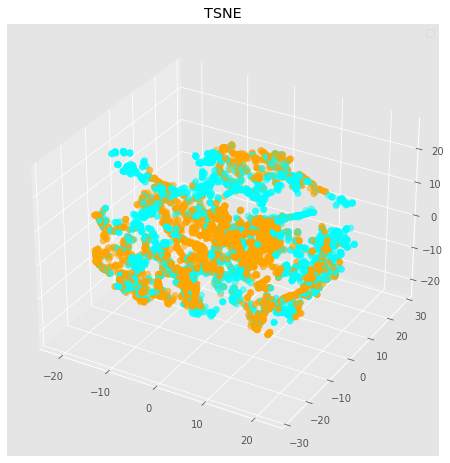

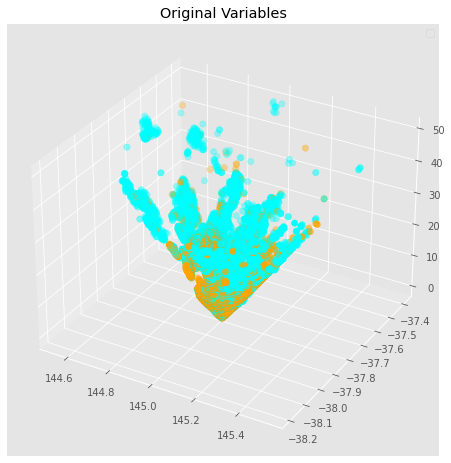

In [6]:

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
colores=['cyan','orange']
asignar=[]
print(y_price[0])
y_pintar=y_price[random_idx]
print(y_pintar)
for row in y_pintar.astype('int32'):
    asignar.append(colores[row])
ax.set_title('TSNE')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=asignar,s=40)
ax.legend()

# Pintamos Dataframe original
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
colores=['cyan','orange']
asignar=[]
y_pintar=y_price
for row in y_pintar.astype('int32'):
    asignar.append(colores[row])
ax.set_title('Original Variables')
ax.legend()
ax.scatter(X_new[:, 1], X_new[:, 2], X_new[:, 0], c=asignar,s=40,)


Como se puede puede ver en las figuras anteriores la relacion con el precio es claramente interpretable en las tres variables directas del dataframe original, no ocurre lo mismo con las variables obtenidas de TSNE. Cabe suponer que si alguno de los dos dataframe nos sirve para hacer clustering que tengan relacion con el precio este será el que llevemos a cabo con el dataframe original. 


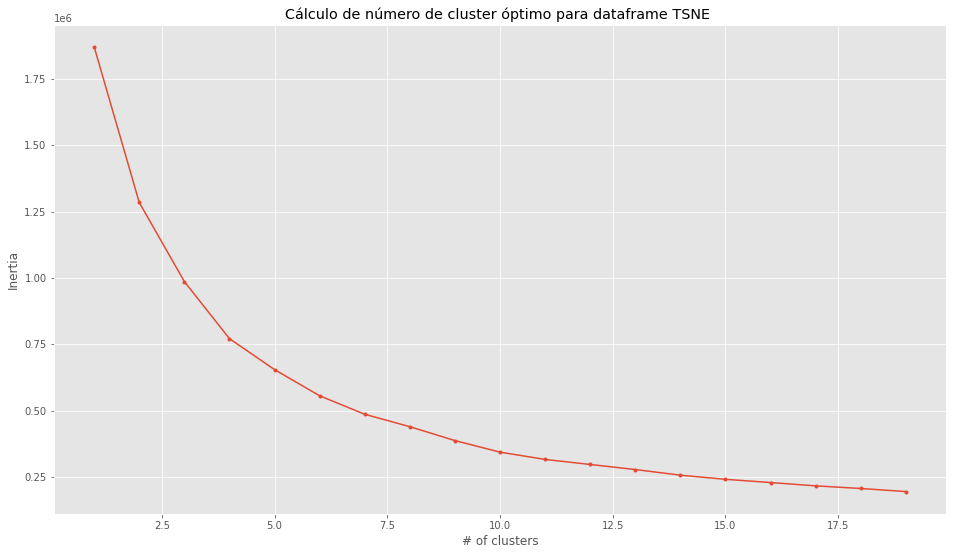

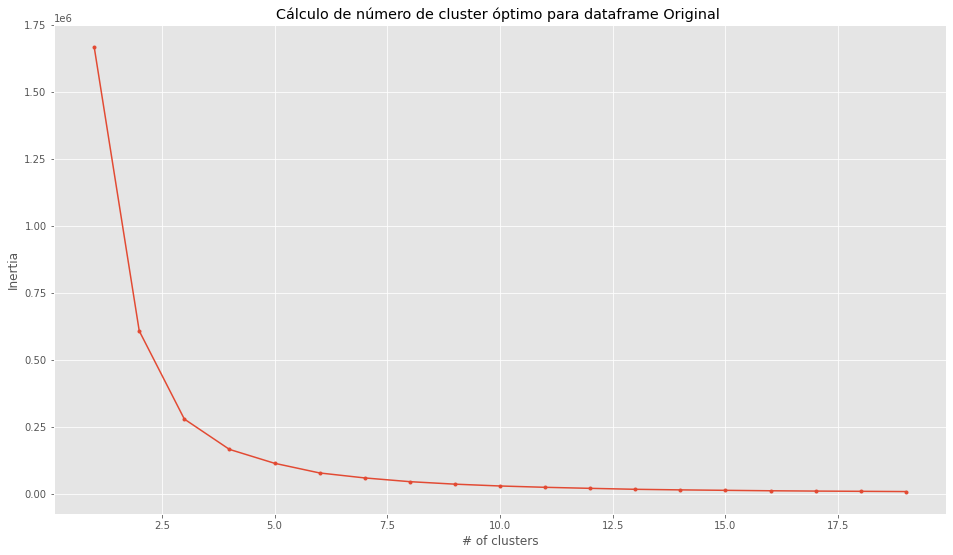

In [7]:
from sklearn.cluster import KMeans


#Inertia para TSNE
K = range(1,20)
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_tsne)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.title('Cálculo de número de cluster óptimo para dataframe TSNE ')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()



#Inertia para Dataframe original
K = range(1,20)
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_new)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.title('Cálculo de número de cluster óptimo para dataframe Original ')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()


Vamos a crear el cluster en primer lugar ambos cluster uno con TSNE y el otro con variables originales y optimizaremos el numero de agrupaciones en cada uno de ellos.

Cluster sizes k-means: [738 887 636 684 769 664 622]
Cluster distances k-means: [3679857.5, 3031114.0, 3384590.5, 3247705.5, 2805486.8, 3853161.5, 2847426.5]


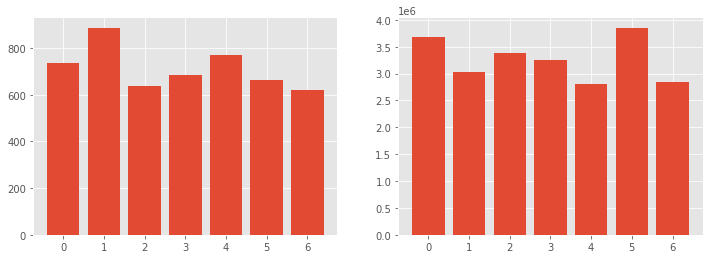

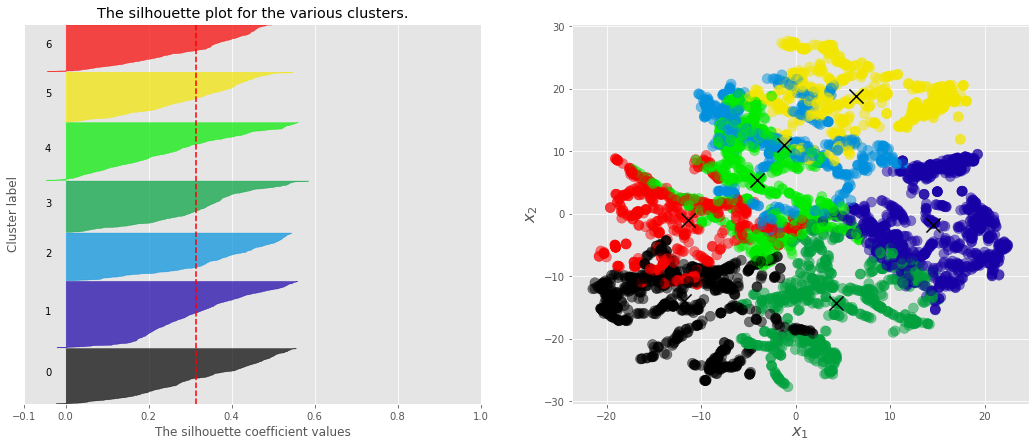

In [8]:
k_TSNE = 7
kmeans_TSNE = KMeans(n_clusters=k_TSNE, random_state=0)
labels_km_TSNE = kmeans_TSNE.fit_predict(X_tsne)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km_TSNE)))

distances_TSNE = []
for c in kmeans_TSNE.cluster_centers_:
    d = np.sum( np.sum((X_tsne - c) ** 2, axis=1) ) 
    distances_TSNE.append(d.round(2))
    
print("Cluster distances k-means: {}".format(distances_TSNE))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.bar(range(k_TSNE),np.bincount(labels_km_TSNE))
plt.subplot(122)
plt.bar(range(k_TSNE),distances_TSNE)
plt.show()
plot_silhouette(X_tsne,k_TSNE,kmeans_TSNE.labels_,kmeans_TSNE.cluster_centers_)


En el caso de TSNE parece que **la mejor agrupacióon nos la hace con K =7 ( 7 clusters)**.

Pasamos a hacer los mismo con las variables del Dataframe original.

Cluster sizes k-means: [14753 10013  2290]
Cluster distances k-means: [2484415.34, 2069834.93, 11057235.12]


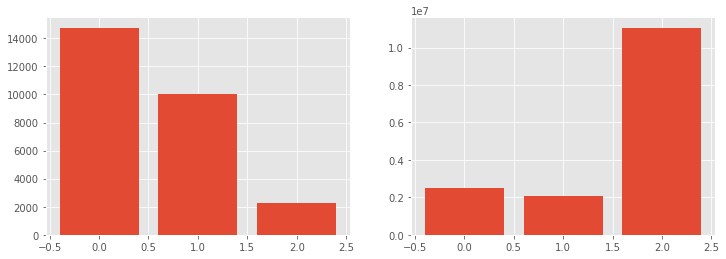

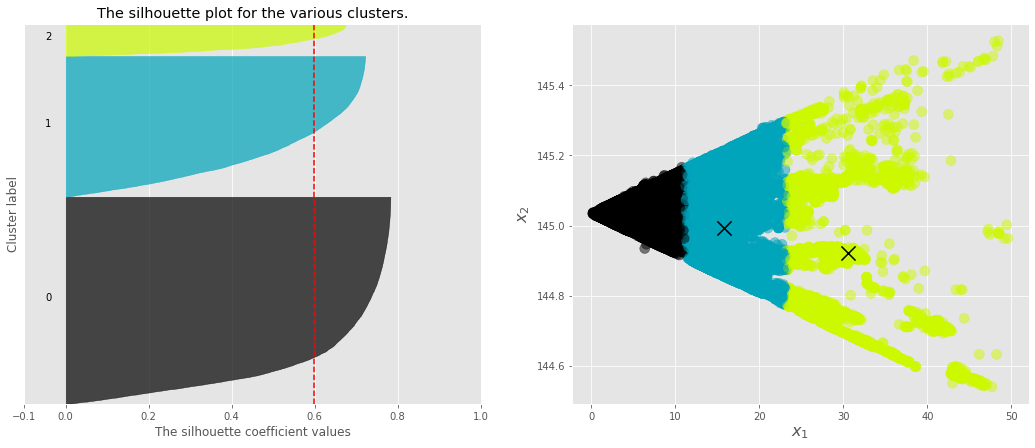

In [9]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
labels_km = kmeans.fit_predict(X_new)

print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

distances = []
for c in kmeans.cluster_centers_:
    d = np.sum( np.sum((X_new - c) ** 2, axis=1) ) 
    distances.append(d.round(2))
    
print("Cluster distances k-means: {}".format(distances))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.bar(range(k),np.bincount(labels_km))

plt.subplot(122)
plt.bar(range(k),distances)
plt.show()

plot_silhouette(X_new,k,kmeans.labels_,kmeans.cluster_centers_)


En el caso de la agrupación variables originales parece que **la mejor agrupacióon nos la hace con K =3 ( 3 clusters)**.

Una vez creados los cluster vamos estudiar qué contiene cada uno de ellos

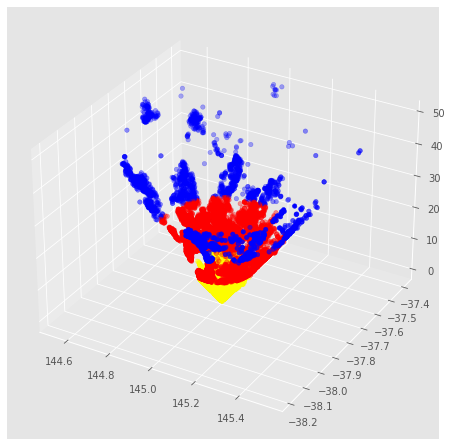

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)

colores=['yellow','red','blue']
asignarx=[]

for row in labels_km.astype('int32'):
    asignarx.append(colores[row])
ax.scatter(X_new[:, 1], X_new[:, 2], X_new[:, 0], c=asignarx,s=20)



Como se puede puede parece que los tres cluster llevados a cabo han tenido en cuenta perfectamente las variables por lo que cabe espera que la relacion con el precio sea buena.


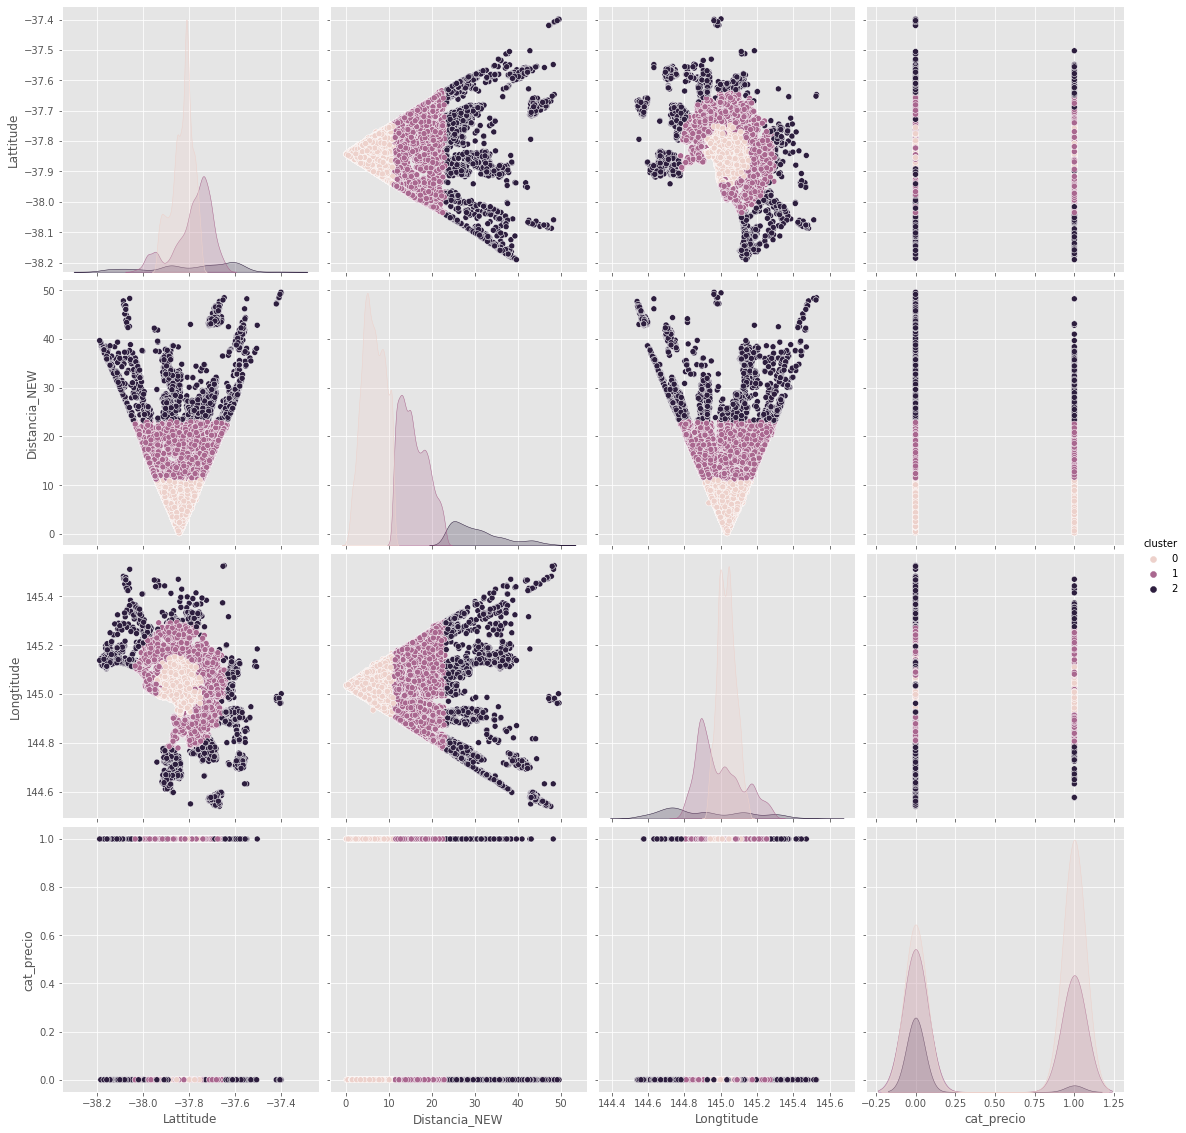

In [11]:
data_RF['cluster']=labels_km
sb.pairplot(data_RF.dropna(), hue='cluster',size=4,vars=["Lattitude","Distancia_NEW","Longtitude","cat_precio"],kind='scatter')

In [12]:
 
print("elementos mas cercanos y mas lejanos del cluster 0")
close_to_far_from_center(X_new,kmeans.cluster_centers_[0])


elementos mas cercanos y mas lejanos del cluster 0
Close to center


,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,Distancia_NEW,Longtitude,Lattitude,Location_TRA,Price,cat_precio,cluster
9533,3,13.9,3165.0,1,2,638.0,10969.0,6.455055,145.037911,-37.811033,3.836785,1050000,1,0
12375,3,18.4,3029.0,1,2,515.8,10160.0,6.442608,145.031103,-37.812137,3.836425,545000,0,0
1133,4,13.9,3165.0,2,2,364.6,10969.0,6.452788,145.049978,-37.809721,3.837283,1235000,1,0
1260,4,13.9,3165.0,2,2,364.6,10969.0,6.452788,145.049978,-37.809721,3.837283,1235000,1,0
5943,4,9.9,3044.0,2,2,490.3,7485.0,6.452338,145.037719,-37.801243,3.836918,900000,1,0
2711,2,9.2,3058.0,1,2,2130.4,3445.0,6.446261,145.023328,-37.798137,3.836998,830000,0,0
21349,1,6.3,3013.0,1,1,110.7,6543.0,6.464547,145.025140,-37.793561,3.837072,312000,0,0
1265,6,13.9,3165.0,3,3,590.2,10969.0,6.470239,145.056329,-37.854979,3.831685,1300000,1,0
18764,2,4.3,3032.0,1,1,979.9,6567.0,6.443454,145.009735,-37.798933,3.835737,560000,0,0
7503,4,9.7,3041.0,2,2,511.1,3284.0,6.436502,145.060570,-37.809797,3.837551,1055000,1,0


Far from center


,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,Distancia_NEW,Longtitude,Lattitude,Location_TRA,Price,cat_precio,cluster
20214,3,45.9,3437.0,2,4,40468.0,290.0,48.231807,144.63257,-37.54812,3.851926,930000,1,2
17077,4,47.3,3810.0,2,2,488.6,17384.0,48.306749,145.51137,-38.05934,3.823276,442000,0,2
23275,3,44.2,3756.0,1,1,555.5,3988.0,48.416964,144.97782,-37.40869,3.875512,390000,0,2
16710,3,44.2,3756.0,1,1,502.0,3988.0,48.437659,144.97749,-37.40853,3.875520,366000,0,2
11188,3,45.2,3777.0,2,4,724.0,3307.0,48.465570,145.52635,-37.64685,3.865565,650000,0,2
25562,4,44.2,3756.0,2,2,757.0,3988.0,48.509563,144.98302,-37.40744,3.875780,560000,0,2
20801,3,44.2,3756.0,1,2,679.0,3988.0,48.599281,144.97590,-37.40720,3.875615,411000,0,2
27016,4,44.2,3756.0,2,6,720.0,3988.0,49.150316,144.96232,-37.40349,3.875636,565000,0,2
23274,5,44.2,3756.0,3,2,908.8,3988.0,49.449786,145.00176,-37.39780,3.877280,600000,0,2
23276,4,44.2,3756.0,2,2,924.0,3988.0,49.578383,144.96369,-37.39946,3.876090,590000,0,2


Vamos a ver las variables estadisticas mas importante de cada cluster:

In [13]:
data_RF.groupby('cluster')["cat_precio","Price"].describe()

cat_precio                                                 Price  \
             count      mean       std  min  25%  50%  75%  max    count   
cluster                                                                    
0          14753.0  0.600895  0.489731  0.0  0.0  1.0  1.0  1.0  14753.0   
1          10013.0  0.449715  0.497490  0.0  0.0  0.0  1.0  1.0  10013.0   
2           2290.0  0.080349  0.271893  0.0  0.0  0.0  0.0  1.0   2290.0   

                                                                     \
                 mean            std       min       25%        50%   
cluster                                                               
0        1.213609e+06  757576.607162  112000.0  680000.0  1041000.0   
1        9.140778e+05  408364.004186   85000.0  655000.0   835000.0   
2        6.330686e+05  188911.480002  266000.0  515000.0   601000.0   

                                
               75%         max  
cluster                         
0        1525000.0  11200000.0  
1        1075000.0   9000000.0  
2         705000.0   2300000.0

**El cluster 2 los mas baratos** ya que mas del 75 % de los elementos de ese cluster están clasificados como baratos. en el otro extremo está el **cluster 0 donde mas del 50% de los pisos son caros**


 
 **pasamos a hacer la misma comprobacion pero para el dataframe extraido de TSNE**

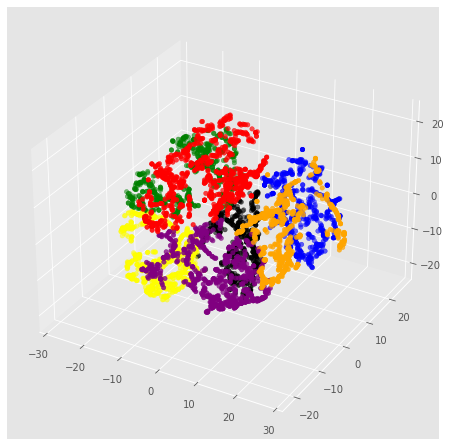

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)

colores=['yellow','red','blue','green','purple','orange','black']
asignarx_tsne=[]

for row in labels_km_TSNE.astype('int32'):
    asignarx_tsne.append(colores[row])
ax.scatter(X_tsne[:, 1], X_tsne[:, 2], X_tsne[:, 0], c=asignarx_tsne,s=20)

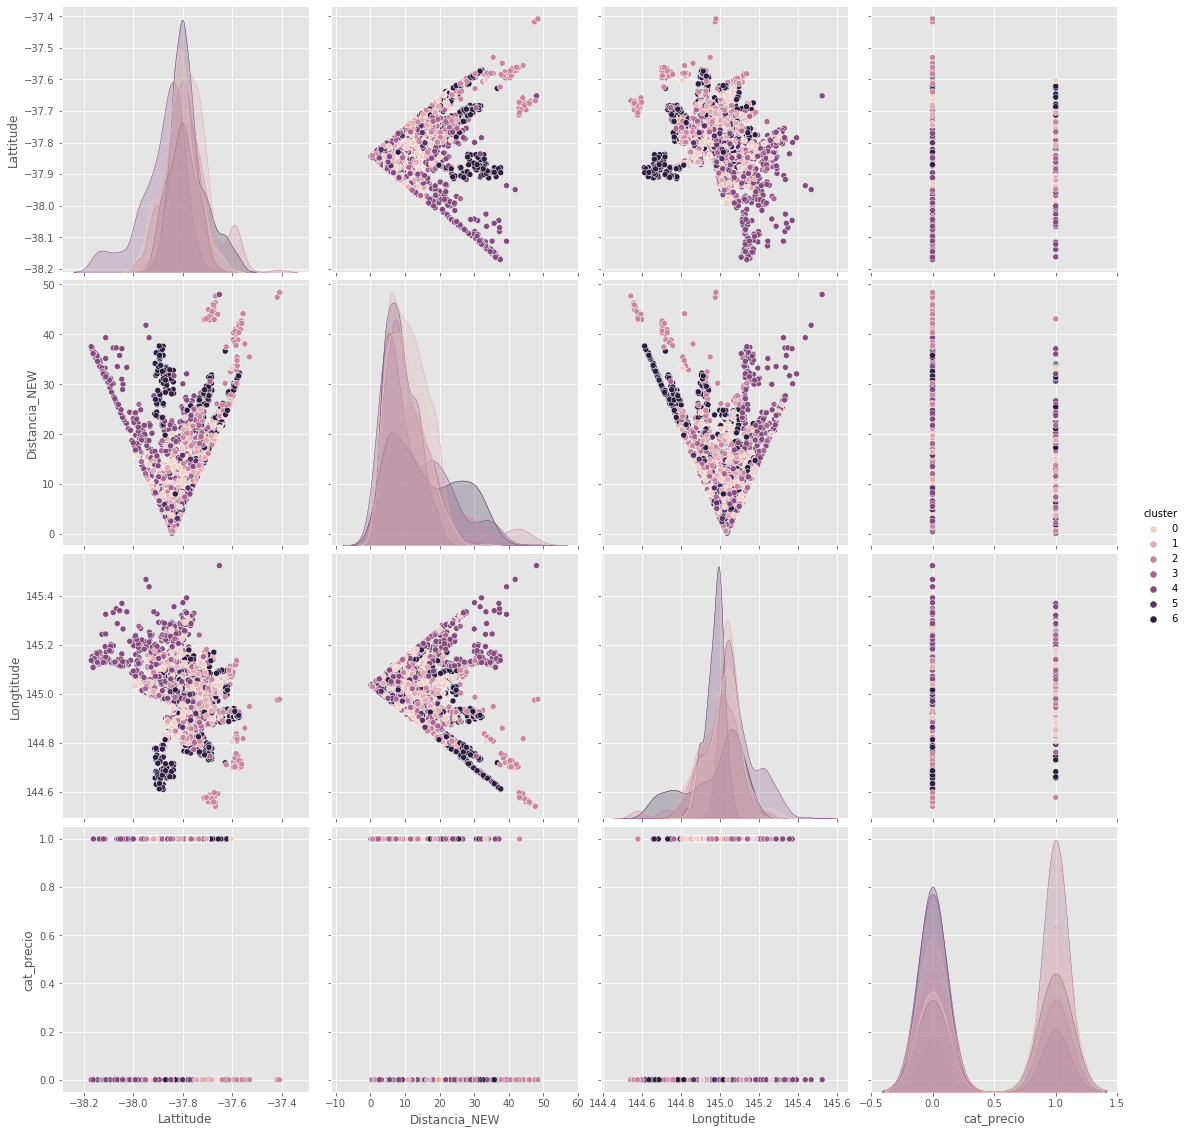

In [15]:
data_RF_xs=data_RF.iloc[random_idx]
data_RF_xs['cluster']=labels_km_TSNE

sb.pairplot(data_RF_xs.dropna(), hue='cluster',size=4,vars=["Lattitude","Distancia_NEW","Longtitude","cat_precio"],kind='scatter')

In [16]:
print("elementos mas cercanos y mas lejanos del cluster 0")
close_to_far_from_center(X_tsne,kmeans_TSNE.cluster_centers_[0])

elementos mas cercanos y mas lejanos del cluster 0
Close to center


,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,Distancia_NEW,Longtitude,Lattitude,Location_TRA,Price,cat_precio,cluster
4070,1,4.6,3122.0,1,1,0.0,11308.0,3.651682,145.017100,-37.81280,3.835133,480000,0,0
356,3,6.3,3143.0,2,1,316.0,4836.0,1.746361,145.019000,-37.85210,3.831201,2365000,1,0
3749,3,13.0,3046.0,2,1,190.0,8870.0,18.058280,144.936700,-37.69970,3.844505,460000,0,1
3937,3,13.7,3188.0,2,1,401.8,5454.0,3.434537,145.008314,-37.83325,3.832939,1271000,1,0
3315,2,3.5,3068.0,1,2,0.0,6244.0,7.281155,144.982400,-37.79180,3.836345,675000,0,0
3565,2,9.2,3146.0,1,1,0.0,10412.0,1.938587,145.049000,-37.85590,3.831609,480000,0,0
1396,3,11.2,3186.0,0,0,0.0,10579.0,10.372661,144.993500,-37.93010,3.822650,1900000,1,0
2046,4,11.7,3125.0,2,2,499.0,5678.0,6.884333,145.110100,-37.85930,3.832879,1250000,1,0
1160,4,13.9,3165.0,2,2,618.0,10969.0,9.363937,145.056200,-37.92520,3.824797,1352000,1,0
1488,4,11.2,3186.0,2,2,471.0,10579.0,6.491109,145.003700,-37.89560,3.826399,2000000,1,0


Far from center


,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,Distancia_NEW,Longtitude,Lattitude,Location_TRA,Price,cat_precio,cluster
3211,2,5.8,3078.0,1,1,0.0,2970.0,7.592068,145.017800,-37.775500,3.838938,505000,0,0
1809,3,5.2,3056.0,1,1,480.0,11918.0,6.828452,145.029500,-37.903940,3.826238,1317000,1,0
2839,3,13.9,3108.0,2,2,0.0,9028.0,10.604569,145.127300,-37.781400,3.841237,958000,1,0
285,3,11.1,3025.0,1,2,600.6,5132.0,5.152254,145.028777,-37.823359,3.835045,765000,0,0
4633,4,5.6,3101.0,1,2,832.0,10331.0,4.659992,145.054500,-37.803600,3.837055,2513000,1,0
2870,3,13.9,3108.0,2,2,353.9,9028.0,8.651773,145.112300,-37.792570,3.839676,901000,1,0
2424,2,9.3,3162.0,1,1,367.0,5051.0,6.389295,145.024100,-37.899500,3.826544,825000,0,0
2516,3,3.4,3068.0,3,1,994.8,2954.0,6.221548,144.998300,-37.794306,3.836511,841000,0,0
3742,3,13.0,3046.0,1,1,796.0,8870.0,18.959820,144.925300,-37.695500,3.844631,710000,0,1
2938,3,8.5,3185.0,1,1,418.0,4898.0,4.814966,145.015300,-37.883100,3.827968,1605000,1,0


In [17]:
print("elementos mas cercanos y mas lejanos del cluster 1")
close_to_far_from_center(X_tsne,kmeans_TSNE.cluster_centers_[1])

elementos mas cercanos y mas lejanos del cluster 1
Close to center


,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,Distancia_NEW,Longtitude,Lattitude,Location_TRA,Price,cat_precio,cluster
3007,3,7.7,3184.0,2,0,218.0,8989.0,6.084341,144.979800,-37.875800,3.827769,1561000,1,0
1569,3,10.7,3187.0,1,1,490.0,6938.0,6.998676,145.009700,-37.902400,3.825871,1405000,1,0
934,4,13.0,3204.0,3,2,628.0,6795.0,8.109249,145.040100,-37.915500,3.825351,2700000,1,0
3411,4,6.4,3011.0,1,2,411.0,7570.0,12.508303,144.904900,-37.796900,3.833777,1290000,1,1
3501,3,9.2,3146.0,2,2,273.6,10412.0,2.743096,145.062493,-37.850952,3.832391,1155000,1,0
3649,3,13.0,3046.0,1,1,336.0,8870.0,17.226895,144.935600,-37.708800,3.843548,500000,0,1
3874,3,13.7,3188.0,2,3,1402.0,5454.0,10.772451,144.996300,-37.934700,3.822260,2200000,1,0
3486,2,6.4,3011.0,1,1,355.0,7570.0,13.572995,144.893800,-37.793100,3.833869,745000,0,1
1103,4,13.9,3165.0,2,4,653.0,10969.0,9.888454,145.079200,-37.924400,3.825484,1100000,1,0
1465,4,11.2,3186.0,2,4,569.0,10579.0,8.487205,145.052940,-37.917660,3.825472,2800000,1,0


Far from center


,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,Distancia_NEW,Longtitude,Lattitude,Location_TRA,Price,cat_precio,cluster
3776,4,13.0,3046.0,2,2,535.2,8870.0,6.136212,145.083569,-37.819811,3.836451,640000,0,0
1170,3,13.9,3165.0,1,4,746.0,10969.0,9.403487,145.078700,-37.919800,3.825935,1300000,1,0
2383,1,8.1,3161.0,1,1,952.0,6923.0,3.539750,145.037100,-37.874400,3.829423,290000,0,0
3078,3,8.0,3040.0,1,1,503.0,9264.0,15.642122,144.905900,-37.745600,3.839014,1240000,1,1
2233,3,3.2,3054.0,2,1,163.0,3106.0,8.187062,144.975100,-37.786000,3.836741,1955000,1,0
1414,5,11.2,3186.0,2,2,655.0,10579.0,9.681744,145.004400,-37.926400,3.823310,1562500,1,0
4098,2,4.6,3122.0,1,1,0.0,11308.0,2.107194,145.026000,-37.824900,3.834141,445000,0,0
4480,2,4.2,3031.0,1,1,79.0,5263.0,10.505485,144.934400,-37.791400,3.835116,650000,0,0
268,4,11.1,3025.0,1,4,558.0,5132.0,16.011262,144.852900,-37.845100,3.827521,650000,0,1
4981,3,8.7,3032.0,1,2,597.0,4918.0,15.676748,144.887700,-37.763000,3.836763,975000,1,1


In [18]:
data_RF_xs.groupby('cluster')["cat_precio","Price"].describe()

cat_precio                                               Price  \
             count      mean       std  min  25%  50%  75%  max  count   
cluster                                                                  
0            738.0  0.619241  0.485903  0.0  0.0  1.0  1.0  1.0  738.0   
1            887.0  0.517475  0.499976  0.0  0.0  1.0  1.0  1.0  887.0   
2            636.0  0.451258  0.498010  0.0  0.0  0.0  1.0  1.0  636.0   
3            684.0  0.823099  0.381864  0.0  1.0  1.0  1.0  1.0  684.0   
4            769.0  0.315995  0.465213  0.0  0.0  0.0  1.0  1.0  769.0   
5            664.0  0.231928  0.422381  0.0  0.0  0.0  0.0  1.0  664.0   
6            622.0  0.564309  0.496246  0.0  0.0  1.0  1.0  1.0  622.0   

                                                                     \
                 mean            std       min       25%        50%   
cluster                                                               
0        1.157657e+06  582701.527668  341500.0  767625.0   988000.0   
1        9.897082e+05  413514.867489  280000.0  700000.0   890000.0   
2        9.200138e+05  417934.530782  330000.0  605000.0   820000.0   
3        1.661466e+06  960344.836660  440000.0  983750.0  1400000.0   
4        8.471784e+05  420642.189752  327500.0  580000.0   737000.0   
5        6.568039e+05  341081.099126  160000.0  412000.0   550000.0   
6        1.196831e+06  750878.525099  325000.0  680000.0   950000.0   

                               
               75%        max  
cluster                        
0        1413000.0  4650000.0  
1        1219250.0  2910000.0  
2        1182750.0  2640000.0  
3        1963750.0  6600000.0  
4         970000.0  3171000.0  
5         832250.0  2810000.0  
6        1478750.0  7000000.0

En este caso los cluster 0, 2 y 6 son los que parecen tener los precios mas bajos aunque  el grupo 0 y el 6 ya contienen valores mas altos

**CONCLUSIÓN: en ambos casos es que en ningun de los dos casos agrupa de manera adecuada al precio (independientemente de si usamos o no TSNE para transformar los datos)**

Vamos a añadir una variable mas que tenia mucho peso que es el numero de habitaciones y probaremos de nuevo el cluster

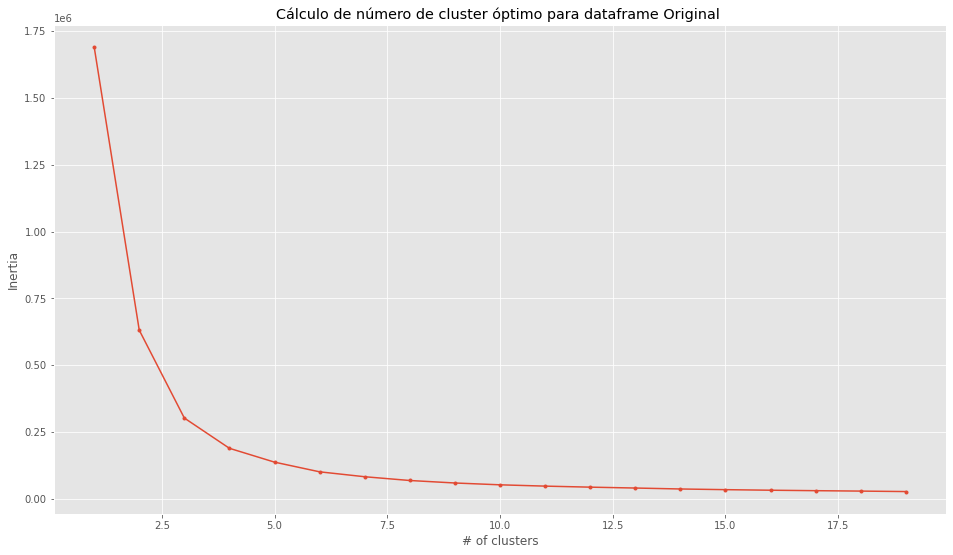

In [19]:
X_2 = np.array(data_RF.iloc[:,[0,7,8,9]].values)
X_2.shape




#Inertia para Dataframe original
K = range(1,20)
inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_2)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.title('Cálculo de número de cluster óptimo para dataframe Original ')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

Cluster sizes k-means: [19513  7543]
Cluster distances k-means: [2099735.18, 4452240.82]


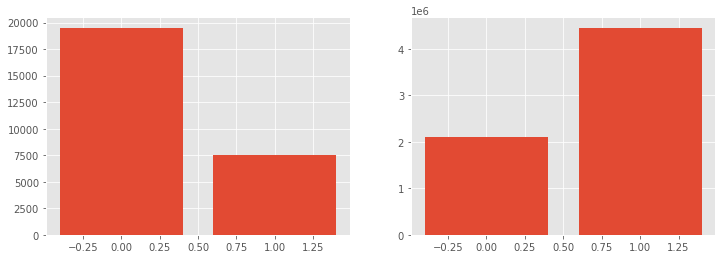

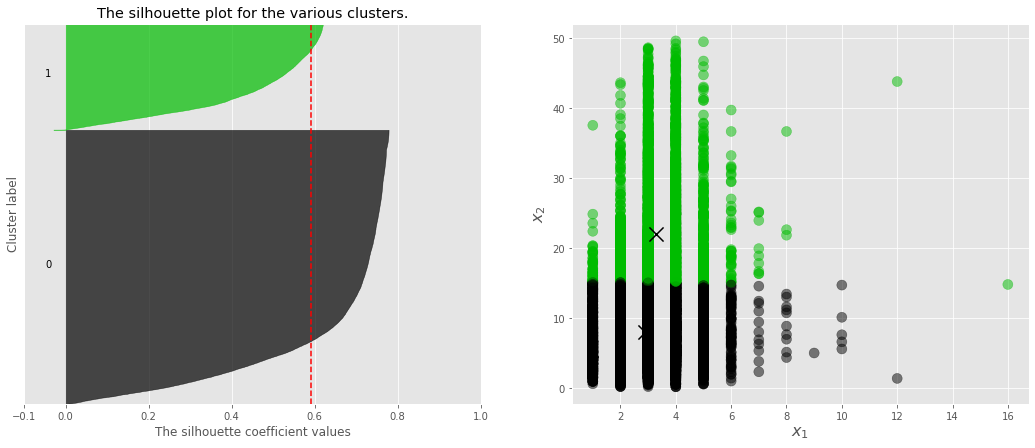

In [20]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
labels_km = kmeans.fit_predict(X_2)

print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

distances = []
for c in kmeans.cluster_centers_:
    d = np.sum( np.sum((X_2 - c) ** 2, axis=1) ) 
    distances.append(d.round(2))
    
print("Cluster distances k-means: {}".format(distances))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.bar(range(k),np.bincount(labels_km))

plt.subplot(122)
plt.bar(range(k),distances)
plt.show()

plot_silhouette(X_2,k,kmeans.labels_,kmeans.cluster_centers_)

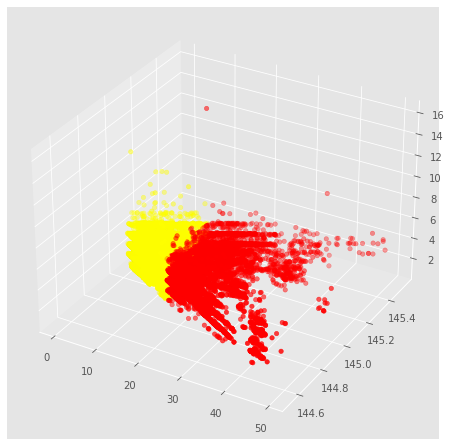

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)

colores=['yellow','red','blue']
asignarx=[]

for row in labels_km.astype('int32'):
    asignarx.append(colores[row])
ax.scatter(X_2[:, 1], X_2[:, 2], X_2[:, 0], c=asignarx,s=20)

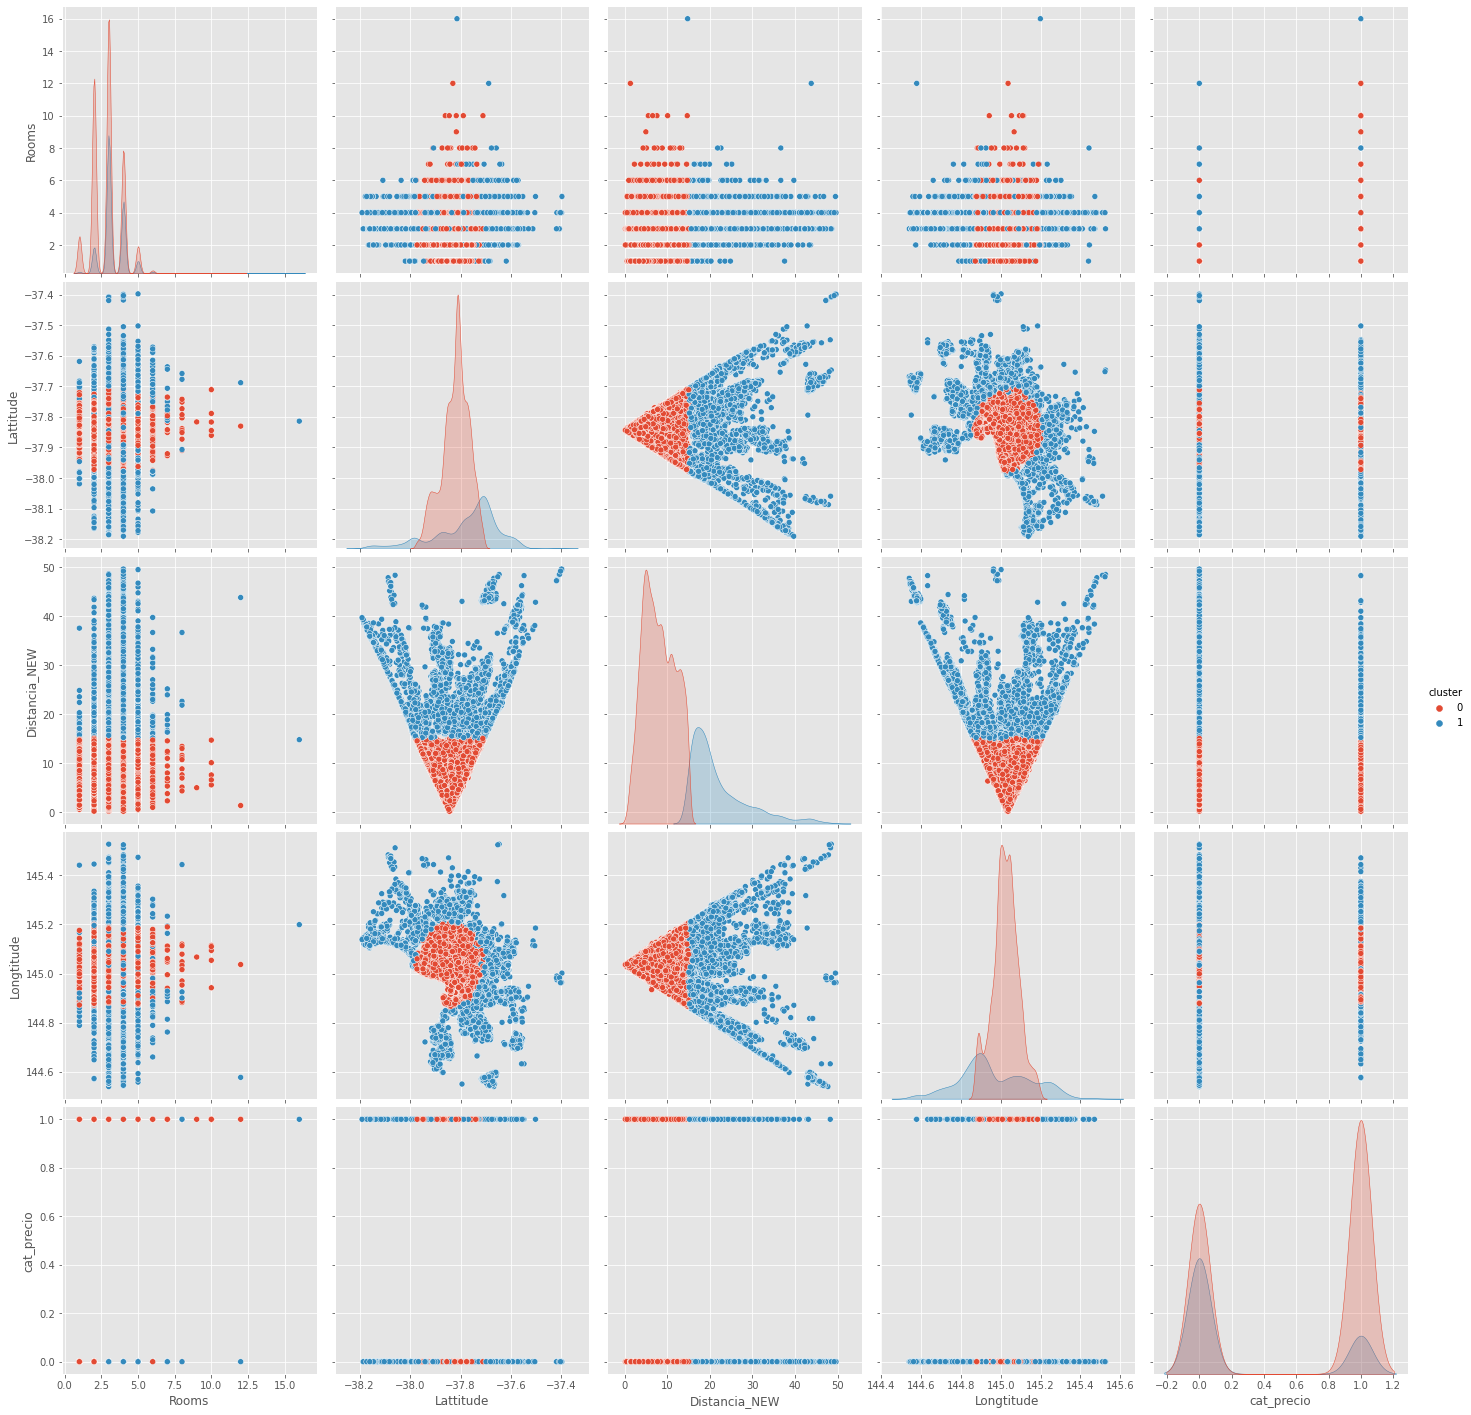

In [22]:
data_RF['cluster']=labels_km
sb.pairplot(data_RF.dropna(), hue='cluster',size=4,vars=["Rooms","Lattitude","Distancia_NEW","Longtitude","cat_precio"],kind='scatter')

In [23]:
print("elementos mas cercanos y mas lejanos del cluster 0")
close_to_far_from_center(X_2,kmeans.cluster_centers_[0])

elementos mas cercanos y mas lejanos del cluster 0
Close to center


,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,Distancia_NEW,Longtitude,Lattitude,Location_TRA,Price,cat_precio,cluster
11604,3,7.5,3040.0,2,1,321.0,9264.0,8.051870,145.018590,-37.807902,3.835605,1520000,1,0
21852,3,12.0,3073.0,1,2,523.0,21650.0,8.062897,145.034955,-37.800517,3.836629,740000,0,0
3225,3,5.8,3078.0,2,4,735.0,2970.0,8.060103,145.022500,-37.770600,3.839560,2350000,1,0
5673,3,5.5,3070.0,2,2,608.0,11364.0,8.082966,144.996700,-37.776300,3.838298,900000,1,0
5601,3,5.5,3070.0,2,1,267.0,11364.0,8.057352,145.003300,-37.774400,3.838666,1310000,1,0
26117,3,12.3,3166.0,1,2,422.3,3224.0,8.085402,145.073472,-37.815133,3.837126,905000,1,0
3329,3,3.5,3068.0,1,0,370.0,6244.0,8.078150,144.989200,-37.779400,3.837785,1600000,1,0
22480,3,5.3,3070.0,1,2,419.9,11364.0,8.052328,145.012500,-37.772200,3.839133,1290000,1,0
24669,3,3.6,3068.0,2,2,139.0,6244.0,8.066954,144.984340,-37.781890,3.837403,1125000,1,0
3233,3,5.8,3078.0,1,1,0.0,2970.0,8.047036,145.017300,-37.771400,3.839341,1500000,1,0


Far from center


,Rooms,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,Distancia_NEW,Longtitude,Lattitude,Location_TRA,Price,cat_precio,cluster
20214,3,45.9,3437.0,2,4,40468.0,290.0,48.231807,144.63257,-37.54812,3.851926,930000,1,1
17077,4,47.3,3810.0,2,2,488.6,17384.0,48.306749,145.51137,-38.05934,3.823276,442000,0,1
23275,3,44.2,3756.0,1,1,555.5,3988.0,48.416964,144.97782,-37.40869,3.875512,390000,0,1
16710,3,44.2,3756.0,1,1,502.0,3988.0,48.437659,144.97749,-37.40853,3.875520,366000,0,1
11188,3,45.2,3777.0,2,4,724.0,3307.0,48.465570,145.52635,-37.64685,3.865565,650000,0,1
25562,4,44.2,3756.0,2,2,757.0,3988.0,48.509563,144.98302,-37.40744,3.875780,560000,0,1
20801,3,44.2,3756.0,1,2,679.0,3988.0,48.599281,144.97590,-37.40720,3.875615,411000,0,1
27016,4,44.2,3756.0,2,6,720.0,3988.0,49.150316,144.96232,-37.40349,3.875636,565000,0,1
23274,5,44.2,3756.0,3,2,908.8,3988.0,49.449786,145.00176,-37.39780,3.877280,600000,0,1
23276,4,44.2,3756.0,2,2,924.0,3988.0,49.578383,144.96369,-37.39946,3.876090,590000,0,1


In [24]:
data_RF.groupby('cluster')["cat_precio","Price"].describe()

cat_precio                                                 Price  \
             count      mean       std  min  25%  50%  75%  max    count   
cluster                                                                    
0          19513.0  0.598524  0.490209  0.0  0.0  1.0  1.0  1.0  19513.0   
1           7543.0  0.248310  0.432061  0.0  0.0  0.0  0.0  1.0   7543.0   

                                                                     \
                 mean            std       min       25%        50%   
cluster                                                               
0        1.164169e+06  700796.849546   85000.0  691500.0  1000000.0   
1        7.676423e+05  316897.194666  145000.0  580000.0   702000.0   

                                
               75%         max  
cluster                         
0        1430000.0  11200000.0  
1         870750.0   5000000.0